# Capstone Project - The Battle of Neighborhoods (Week 2)

### 1) First: Taking a look

#### First, we want you to get familiar with Buenos Aires dataset:

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import folium

In [2]:
#Reads page and keeps tables with first row as header
BA_df = pd.read_html("https://es.wikipedia.org/wiki/Anexo:Barrios_de_la_ciudad_de_Buenos_Aires", header=0)

#Keeps first table
BA_df = BA_df[0]

#Rename columns
BA_df.columns=["Barrio", "Superficie (km2)", "Habitantes", "Densidad de habitantes", "Comuna"]

BA_df.dtypes

Barrio                     object
Superficie (km2)           object
Habitantes                float64
Densidad de habitantes    float64
Comuna                     object
dtype: object

In [3]:
#As the initial data is from Argentina, we use "." as we use "," in numbers, so we have to make some changes. As well, that we need to change the Superficie values as numbers

BA_df.loc[:,"Habitantes"]= BA_df["Habitantes"]*1000
BA_df["Densidad de habitantes"]= BA_df["Densidad de habitantes"]*1000
BA_df["Superficie (km2)"]=BA_df["Superficie (km2)"].replace(" km²","", regex=True)
BA_df["Superficie (km2)"]=BA_df["Superficie (km2)"].replace(",",".", regex=True)
BA_df["Superficie (km2)"]=BA_df["Superficie (km2)"].astype(float)

#We will now want to see if the 48 neighborhoods were exported correctly
BA_df

,Barrio,Superficie (km2),Habitantes,Densidad de habitantes,Comuna
0,Agronomía,2.1,34580.0,8645.0,Comuna 15
1,Almagro,4.1,139262.0,33960.0,Comuna 5
2,Balvanera,4.4,152198.0,34950.0,Comuna 3
3,Barracas,7.6,77474.0,10194.0,Comuna 4
4,Belgrano,6.8,138942.0,20433.0,Comuna 13
5,Boedo,2.6,48520.0,18662.0,Comuna 5
6,Caballito,6.8,183396.0,25830.0,Comuna 6
7,Chacarita,3.1,27440.0,9800.0,Comuna 15
8,Coghlan,1.3,19177.0,14752.0,Comuna 12
9,Colegiales,2.3,56998.0,21922.0,Comuna 13


In [4]:
#Lets check the dataset
BA_df.dtypes

Barrio                     object
Superficie (km2)          float64
Habitantes                float64
Densidad de habitantes    float64
Comuna                     object
dtype: object

### 2) Getting coordinates

In [5]:
#Now we need to include the coordinates. For that we donwloaded an Excel file
 
COR=pd.read_excel(r"C:\Users\Fran\Desktop\Projects\Coursera_Capstone\barrioscoordenadas.xlsx")
COR.head()

,WKT,Barrio,comuna,perimetro,area,latitude,longitude
0,"POLYGON ((-58.4771156675186 -34.5951149914833,...",Agronomía,15,6556.167772,2.122169e+06,-34.60000,-58.48333
1,"POLYGON ((-58.4128700313089 -34.6141162515854,...",Almagro,5,8537.901368,4.050752e+06,-34.60000,-58.41667
2,"POLYGON ((-58.4119188098038 -34.5980030767748,...",Balvanera,3,8375.821811,4.342280e+06,-34.61018,-58.40654
3,"POLYGON ((-58.3703353711449 -34.6329258371189,...",Barracas,4,12789.791771,7.953453e+06,-34.65000,-58.36667
4,"POLYGON ((-58.4505669109009 -34.5356104340406,...",Belgrano,13,20609.775397,7.999240e+06,-34.56667,-58.46667


In [6]:
COR=COR.drop(["WKT","comuna","perimetro","area"], axis=1)
COR.head()

,Barrio,latitude,longitude
0,Agronomía,-34.60000,-58.48333
1,Almagro,-34.60000,-58.41667
2,Balvanera,-34.61018,-58.40654
3,Barracas,-34.65000,-58.36667
4,Belgrano,-34.56667,-58.46667


In [7]:
#Now we will merge the two dataframes: We will include the coordinates in BA_df
#Function merge: we indicate each df and the column to compare
BA_df=pd.merge(BA_df, COR, on="Barrio")
BA_df

,Barrio,Superficie (km2),Habitantes,Densidad de habitantes,Comuna,latitude,longitude
0,Agronomía,2.1,34580.0,8645.0,Comuna 15,-34.600000,-58.483330
1,Almagro,4.1,139262.0,33960.0,Comuna 5,-34.600000,-58.416670
2,Balvanera,4.4,152198.0,34950.0,Comuna 3,-34.610180,-58.406540
3,Barracas,7.6,77474.0,10194.0,Comuna 4,-34.650000,-58.366670
4,Belgrano,6.8,138942.0,20433.0,Comuna 13,-34.566670,-58.466670
5,Boedo,2.6,48520.0,18662.0,Comuna 5,-34.633330,-58.350000
6,Caballito,6.8,183396.0,25830.0,Comuna 6,-34.633330,-58.416670
7,Chacarita,3.1,27440.0,9800.0,Comuna 15,-34.616670,-58.450000
8,Coghlan,1.3,19177.0,14752.0,Comuna 12,-34.583330,-58.450000
9,Colegiales,2.3,56998.0,21922.0,Comuna 13,-34.566670,-58.466670


In [9]:
#Lets see now the different neighborhoods 
# create map
map2 = folium.Map(location=[-34.6131516, -58.3772316], zoom_start=12)
    
for i in range(0,len(BA_df)):
    folium.Marker([BA_df.iloc[i]['latitude'], BA_df.iloc[i]['longitude']], popup=BA_df.iloc[i]['Barrio']).add_to(map2)
       
map2

### 3) Lets get the venues

In [10]:
import requests # library to handle requests

#Foursquare API Parameters
CLIENT_ID = 'SDXAHGRFEL1IDROBQ2HRJY2TOHB1LL5X2ZRLQESEKWR2DRR1' 
CLIENT_SECRET = 'VG4A4UFSMK0HGEY2VHMLHJS2YXIIQIQ4PDAEOFOQEVNM3RRV' 
LIMIT=100
VERSION = '20200619'

#As in the New York example, we create a function to explore all the neighborhoods in Buenos Aires

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
BA_venues = getNearbyVenues(names=BA_df["Barrio"],latitudes=BA_df["latitude"],longitudes=BA_df["longitude"])

Agronomía
Almagro
Balvanera
Barracas
Belgrano
Boedo
Caballito
Chacarita
Coghlan
Colegiales
Constitución
Flores
Floresta
La Boca
La Paternal
Liniers
Mataderos
Montserrat
Monte Castro
Nueva Pompeya
Núñez
Palermo
Parque Avellaneda
Parque Chacabuco
Parque Chas
Parque Patricios
Puerto Madero
Recoleta
Retiro
Saavedra
San Cristóbal
San Nicolás
San Telmo
Vélez Sarsfield
Versalles
Villa Crespo
Villa del Parque
Villa Devoto
Villa Gral. Mitre
Villa Lugano
Villa Luro
Villa Ortúzar
Villa Pueyrredón
Villa Real
Villa Riachuelo
Villa Santa Rita
Villa Soldati
Villa Urquiza


In [12]:
BA_venues["Neighborhood"].value_counts().to_frame()

,Neighborhood
Núñez,77
San Nicolás,71
Mataderos,57
Almagro,57
Flores,57
Nueva Pompeya,51
Recoleta,48
Puerto Madero,43
Saavedra,36
Belgrano,35


In [13]:
#Ok, now lets group in most common venue for each neighborhood. Lets start making a one hot encoding to count how many venues categories we have for each neighborhood

# one hot encoding
BA_onehot = pd.get_dummies(BA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BA_onehot['Neighborhood'] = BA_venues['Neighborhood'] 

# move neighborhood column to the first column
first = BA_onehot['Neighborhood']
BA_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
BA_onehot.insert(0, 'Neighborhood', first)

BA_grouped = BA_onehot.groupby('Neighborhood').mean().reset_index()
BA_grouped.head()


,Neighborhood,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theme Restaurant,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Agronomía,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Almagro,0.000000,0.0,0.056604,0.0,0.0,0.0,0.0,0.000000,0.018868,...,0.0,0.0,0.000000,0.018868,0.0,0.0,0.0,0.0,0.0,0.0
2,Balvanera,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Barracas,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Belgrano,0.028571,0.0,0.057143,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.028571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Now we will see who are the 10 monst common venues for each Neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BA_grouped['Neighborhood']

for ind in np.arange(BA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agronomía,Grocery Store,Design Studio,Photography Studio,Snack Place,Athletics & Sports,Coffee Shop,Bus Stop,Falafel Restaurant,Food Court,Food & Drink Shop
1,Almagro,Café,Theater,Argentinian Restaurant,Bakery,Gym / Fitness Center,Empanada Restaurant,Martial Arts Dojo,Coffee Shop,Pizza Place,Public Art
2,Balvanera,Café,Hotel,Fast Food Restaurant,Bus Station,Bus Stop,Pharmacy,Restaurant,Electronics Store,Gym,Peruvian Restaurant
3,Barracas,Music Venue,Ice Cream Shop,Event Space,Food Stand,Food Service,Food Court,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market
4,Belgrano,Coffee Shop,Pharmacy,Deli / Bodega,Café,Supermarket,Plaza,Bookstore,Ice Cream Shop,Argentinian Restaurant,Pastry Shop
5,Boedo,Performing Arts Venue,Pier,Lounge,Women's Store,Food Service,Food Court,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market
6,Caballito,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Intersection,BBQ Joint,Grocery Store,Women's Store,Falafel Restaurant,Food Stand,Food Service
7,Chacarita,Bistro,Soccer Stadium,Bakery,Brewery,Soccer Field,Pharmacy,Liquor Store,Sports Club,Stadium,Restaurant
8,Coghlan,Brewery,Café,Ice Cream Shop,Office,Convenience Store,Beer Bar,Pool,Restaurant,Bookstore,Sandwich Place
9,Colegiales,Coffee Shop,Pharmacy,Deli / Bodega,Café,Supermarket,Plaza,Bookstore,Ice Cream Shop,Argentinian Restaurant,Pastry Shop


In [15]:
BA_merged = BA_df

BA_merged = BA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Barrio')

BA_merged

,Barrio,Superficie (km2),Habitantes,Densidad de habitantes,Comuna,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agronomía,2.1,34580.0,8645.0,Comuna 15,-34.600000,-58.483330,Grocery Store,Design Studio,Photography Studio,Snack Place,Athletics & Sports,Coffee Shop,Bus Stop,Falafel Restaurant,Food Court,Food & Drink Shop
1,Almagro,4.1,139262.0,33960.0,Comuna 5,-34.600000,-58.416670,Café,Theater,Argentinian Restaurant,Bakery,Gym / Fitness Center,Empanada Restaurant,Martial Arts Dojo,Coffee Shop,Pizza Place,Public Art
2,Balvanera,4.4,152198.0,34950.0,Comuna 3,-34.610180,-58.406540,Café,Hotel,Fast Food Restaurant,Bus Station,Bus Stop,Pharmacy,Restaurant,Electronics Store,Gym,Peruvian Restaurant
3,Barracas,7.6,77474.0,10194.0,Comuna 4,-34.650000,-58.366670,Music Venue,Ice Cream Shop,Event Space,Food Stand,Food Service,Food Court,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market
4,Belgrano,6.8,138942.0,20433.0,Comuna 13,-34.566670,-58.466670,Coffee Shop,Pharmacy,Deli / Bodega,Café,Supermarket,Plaza,Bookstore,Ice Cream Shop,Argentinian Restaurant,Pastry Shop
5,Boedo,2.6,48520.0,18662.0,Comuna 5,-34.633330,-58.350000,Performing Arts Venue,Pier,Lounge,Women's Store,Food Service,Food Court,Food & Drink Shop,Fish Market,Fast Food Restaurant,Farmers Market
6,Caballito,6.8,183396.0,25830.0,Comuna 6,-34.633330,-58.416670,Argentinian Restaurant,Pizza Place,Ice Cream Shop,Intersection,BBQ Joint,Grocery Store,Women's Store,Falafel Restaurant,Food Stand,Food Service
7,Chacarita,3.1,27440.0,9800.0,Comuna 15,-34.616670,-58.450000,Bistro,Soccer Stadium,Bakery,Brewery,Soccer Field,Pharmacy,Liquor Store,Sports Club,Stadium,Restaurant
8,Coghlan,1.3,19177.0,14752.0,Comuna 12,-34.583330,-58.450000,Brewery,Café,Ice Cream Shop,Office,Convenience Store,Beer Bar,Pool,Restaurant,Bookstore,Sandwich Place
9,Colegiales,2.3,56998.0,21922.0,Comuna 13,-34.566670,-58.466670,Coffee Shop,Pharmacy,Deli / Bodega,Café,Supermarket,Plaza,Bookstore,Ice Cream Shop,Argentinian Restaurant,Pastry Shop


In [16]:
#We will check if we don´t have any venues in some Neighborhoods

BA_merged['Barrio'].isin(BA_grouped['Neighborhood']).value_counts()

True    48
Name: Barrio, dtype: int64

Now, we will analize the different type of venue appearances. For that we will ponderate:

- 10 points: 1st Most Common Venue
- 9 points: 2nd Most Common Venue
- ...
- 1 point: 10th Most Common Venue

In [17]:
def counter(column,points):
    counter=BA_merged[column].value_counts()*points
    counter.to_frame()
    return counter

In [18]:
counter10=counter("1st Most Common Venue",10)
counter9=counter("2nd Most Common Venue",9)
counter8=counter("3rd Most Common Venue",8)
counter7=counter("4th Most Common Venue",7)
counter6=counter("5th Most Common Venue",6)
counter5=counter("6th Most Common Venue",5)
counter4=counter("7th Most Common Venue",4)
counter3=counter("8th Most Common Venue",3)
counter2=counter("9th Most Common Venue",2)
counter1=counter("10th Most Common Venue",1)

total_points=pd.concat([counter10, counter9,counter8,counter7,counter6,counter5,counter4,counter3,counter2,counter1], axis=1)
total_points["Total"]=total_points.sum(axis=1)
total_points.sort_values(by="Total",ascending=False,inplace=True)
total_points

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Total
Café,30.0,54.0,16.0,35.0,18.0,NaN,8.0,3.0,2.0,1.0,167.0
Pizza Place,70.0,9.0,16.0,35.0,NaN,5.0,NaN,9.0,2.0,NaN,146.0
Ice Cream Shop,10.0,45.0,56.0,NaN,NaN,10.0,4.0,6.0,NaN,NaN,131.0
Argentinian Restaurant,10.0,54.0,24.0,21.0,6.0,NaN,NaN,3.0,6.0,NaN,124.0
Coffee Shop,30.0,27.0,24.0,14.0,NaN,15.0,4.0,3.0,NaN,NaN,117.0
...,...,...,...,...,...,...,...,...,...,...,...
Buffet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Mediterranean Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Peruvian Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Arts & Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [19]:
total_points[["Total"]].head(10)

,Total
Café,167.0
Pizza Place,146.0
Ice Cream Shop,131.0
Argentinian Restaurant,124.0
Coffee Shop,117.0
Bus Stop,102.0
Pharmacy,82.0
Plaza,72.0
Restaurant,67.0
Hotel,64.0


Now we can se the 10th most common Venues in Buenos Aires...
This shows us two things:

- Where are the most common places for people to go
- What kind of store are the most likely for us to attract customers

We will keep our attention in the first 5 most common venues:


In [20]:
total_points[["Total"]].head(5)

,Total
Café,167.0
Pizza Place,146.0
Ice Cream Shop,131.0
Argentinian Restaurant,124.0
Coffee Shop,117.0


Now, we have to know where are the best places to invest in one of this kind of stores. For that we have to analyze the frecuency of appearence: We will see how many of this stores are in each neighborhood per 100 people. 

With that we can predict that we will be investing in a very common store, so we will attract the costumers, but not in a place there are a lot of this kind of stores.


In [21]:
BA_cat=BA_venues[["Neighborhood","Venue","Venue Category","Venue Latitude","Venue Longitude"]]
BA_cafe=BA_cat[BA_cat["Venue Category"]=="Café"].reset_index(drop=True)
BA_cafe.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Almagro,Musetta Caffé,Café,-34.599670,-58.415087
1,Almagro,Café Martínez,Café,-34.603393,-58.417995
2,Almagro,Dixs,Café,-34.597175,-58.415733
3,Almagro,Gratto,Café,-34.603445,-58.419474
4,Balvanera,Havanna,Café,-34.610158,-58.403358


In [22]:
BA_pizza=BA_cat[BA_cat["Venue Category"]=="Pizza Place"].reset_index(drop=True)
BA_pizza.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Almagro,Pizza Zapi,Pizza Place,-34.596600,-58.416854
1,Almagro,Pachi,Pizza Place,-34.600800,-58.420563
2,Belgrano,Croxi,Pizza Place,-34.567996,-58.464945
3,Caballito,Pizzería San Antonio,Pizza Place,-34.631531,-58.416082
4,Chacarita,El Gran Corsini,Pizza Place,-34.617895,-58.447939


In [23]:
BA_ice=BA_cat[BA_cat["Venue Category"]=="Ice Cream Shop"].reset_index(drop=True)
BA_ice.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Barracas,Dylan,Ice Cream Shop,-34.646982,-58.370699
1,Belgrano,Frapole,Ice Cream Shop,-34.568510,-58.467748
2,Belgrano,Emede,Ice Cream Shop,-34.567674,-58.463867
3,Caballito,San Marino,Ice Cream Shop,-34.632524,-58.416027
4,Chacarita,La Veneziana,Ice Cream Shop,-34.615786,-58.451821


In [24]:
BA_ar=BA_cat[BA_cat["Venue Category"]=="Argentinian Restaurant"].reset_index(drop=True)
BA_ar.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Almagro,Doña,Argentinian Restaurant,-34.602194,-58.417898
1,Almagro,El Banderín,Argentinian Restaurant,-34.601654,-58.415303
2,Almagro,Huma Restobar,Argentinian Restaurant,-34.602078,-58.418626
3,Belgrano,Campo Porteño,Argentinian Restaurant,-34.565917,-58.463441
4,Belgrano,El Club de la Milanesa,Argentinian Restaurant,-34.565375,-58.462259


In [25]:
BA_cs=BA_cat[BA_cat["Venue Category"]=="Coffee Shop"].reset_index(drop=True)
BA_cs.head()

,Neighborhood,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Agronomía,Bonafide,Coffee Shop,-34.597865,-58.483596
1,Almagro,Le Blé,Coffee Shop,-34.599125,-58.416058
2,Almagro,Café Cortázar,Coffee Shop,-34.596388,-58.419752
3,Belgrano,Caffeine,Coffee Shop,-34.564401,-58.463121
4,Belgrano,Café Martínez,Coffee Shop,-34.566065,-58.463242


###### We can see in a map each Venue:
 - red: Cafe
 - blue: Pizza Place
 - green: Ice Cream Shop
 - pink: Argentinian Restaurant
 - black: Coffee Shop

In [26]:
map3 = folium.Map(location=[-34.6131516, -58.3772316], zoom_start=12)
    
for i in range(0,len(BA_cafe)):
    folium.Marker([BA_cafe.iloc[i]['Venue Latitude'], BA_cafe.iloc[i]['Venue Longitude']], popup=BA_cafe.iloc[i]['Venue'], icon= folium.Icon(color="red", icon='info-sign')).add_to(map3)
for i in range(0,len(BA_pizza)):
    folium.Marker([BA_pizza.iloc[i]['Venue Latitude'], BA_pizza.iloc[i]['Venue Longitude']], popup=BA_pizza.iloc[i]['Venue'], icon= folium.Icon(color="blue", icon='info-sign')).add_to(map3)
for i in range(0,len(BA_ice)):
    folium.Marker([BA_ice.iloc[i]['Venue Latitude'], BA_ice.iloc[i]['Venue Longitude']], popup=BA_ice.iloc[i]['Venue'], icon= folium.Icon(color="green", icon='info-sign')).add_to(map3)
for i in range(0,len(BA_ar)):
    folium.Marker([BA_ar.iloc[i]['Venue Latitude'], BA_ar.iloc[i]['Venue Longitude']], popup=BA_ar.iloc[i]['Venue'], icon= folium.Icon(color="pink", icon='info-sign')).add_to(map3)
for i in range(0,len(BA_cs)):
    folium.Marker([BA_cs.iloc[i]['Venue Latitude'], BA_cs.iloc[i]['Venue Longitude']], popup=BA_cs.iloc[i]['Venue'], icon= folium.Icon(color="black", icon='info-sign')).add_to(map3)
       
map3

In [27]:
BA_res=BA_df
BA_res.set_index("Barrio",drop=True, inplace=True)

In [28]:
#Now we will include 1 column with different amounts of each venue category and calculate for each neighborhood the density of each category in relation to the number of inhabitants
BA_res["Cafe"]=BA_cafe["Neighborhood"].value_counts().to_frame()
BA_res["Cafe per person"]=BA_res["Cafe"]/BA_res["Habitantes"]

BA_res["Pizza Place"]=BA_pizza["Neighborhood"].value_counts().to_frame()
BA_res["Pizza Place per person"]=BA_res["Pizza Place"]/BA_res["Habitantes"]

BA_res["Ice Cream Shop"]=BA_ice["Neighborhood"].value_counts().to_frame()
BA_res["Ice Cream Shop per person"]=BA_res["Ice Cream Shop"]/BA_res["Habitantes"]

BA_res["Argentinian Restaurant"]=BA_ar["Neighborhood"].value_counts().to_frame()
BA_res["Argentinian Restaurant per person"]=BA_res["Argentinian Restaurant"]/BA_res["Habitantes"]

BA_res["Coffee Shop"]=BA_cs["Neighborhood"].value_counts().to_frame()
BA_res["Coffee Shop per person"]=BA_res["Coffee Shop"]/BA_res["Habitantes"]

BA_res.head()

,Superficie (km2),Habitantes,Densidad de habitantes,Comuna,latitude,longitude,Cafe,Cafe per person,Pizza Place,Pizza Place per person,Ice Cream Shop,Ice Cream Shop per person,Argentinian Restaurant,Argentinian Restaurant per person,Coffee Shop,Coffee Shop per person
Barrio,,,,,,,,,,,,,,,,
Agronomía,2.1,34580.0,8645.0,Comuna 15,-34.60000,-58.48333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000029
Almagro,4.1,139262.0,33960.0,Comuna 5,-34.60000,-58.41667,4.0,0.000029,2.0,0.000014,NaN,NaN,3.0,0.000022,2.0,0.000014
Balvanera,4.4,152198.0,34950.0,Comuna 3,-34.61018,-58.40654,3.0,0.000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barracas,7.6,77474.0,10194.0,Comuna 4,-34.65000,-58.36667,NaN,NaN,NaN,NaN,1.0,0.000013,NaN,NaN,NaN,NaN
Belgrano,6.8,138942.0,20433.0,Comuna 13,-34.56667,-58.46667,2.0,0.000014,1.0,0.000007,2.0,0.000014,2.0,0.000014,3.0,0.000022


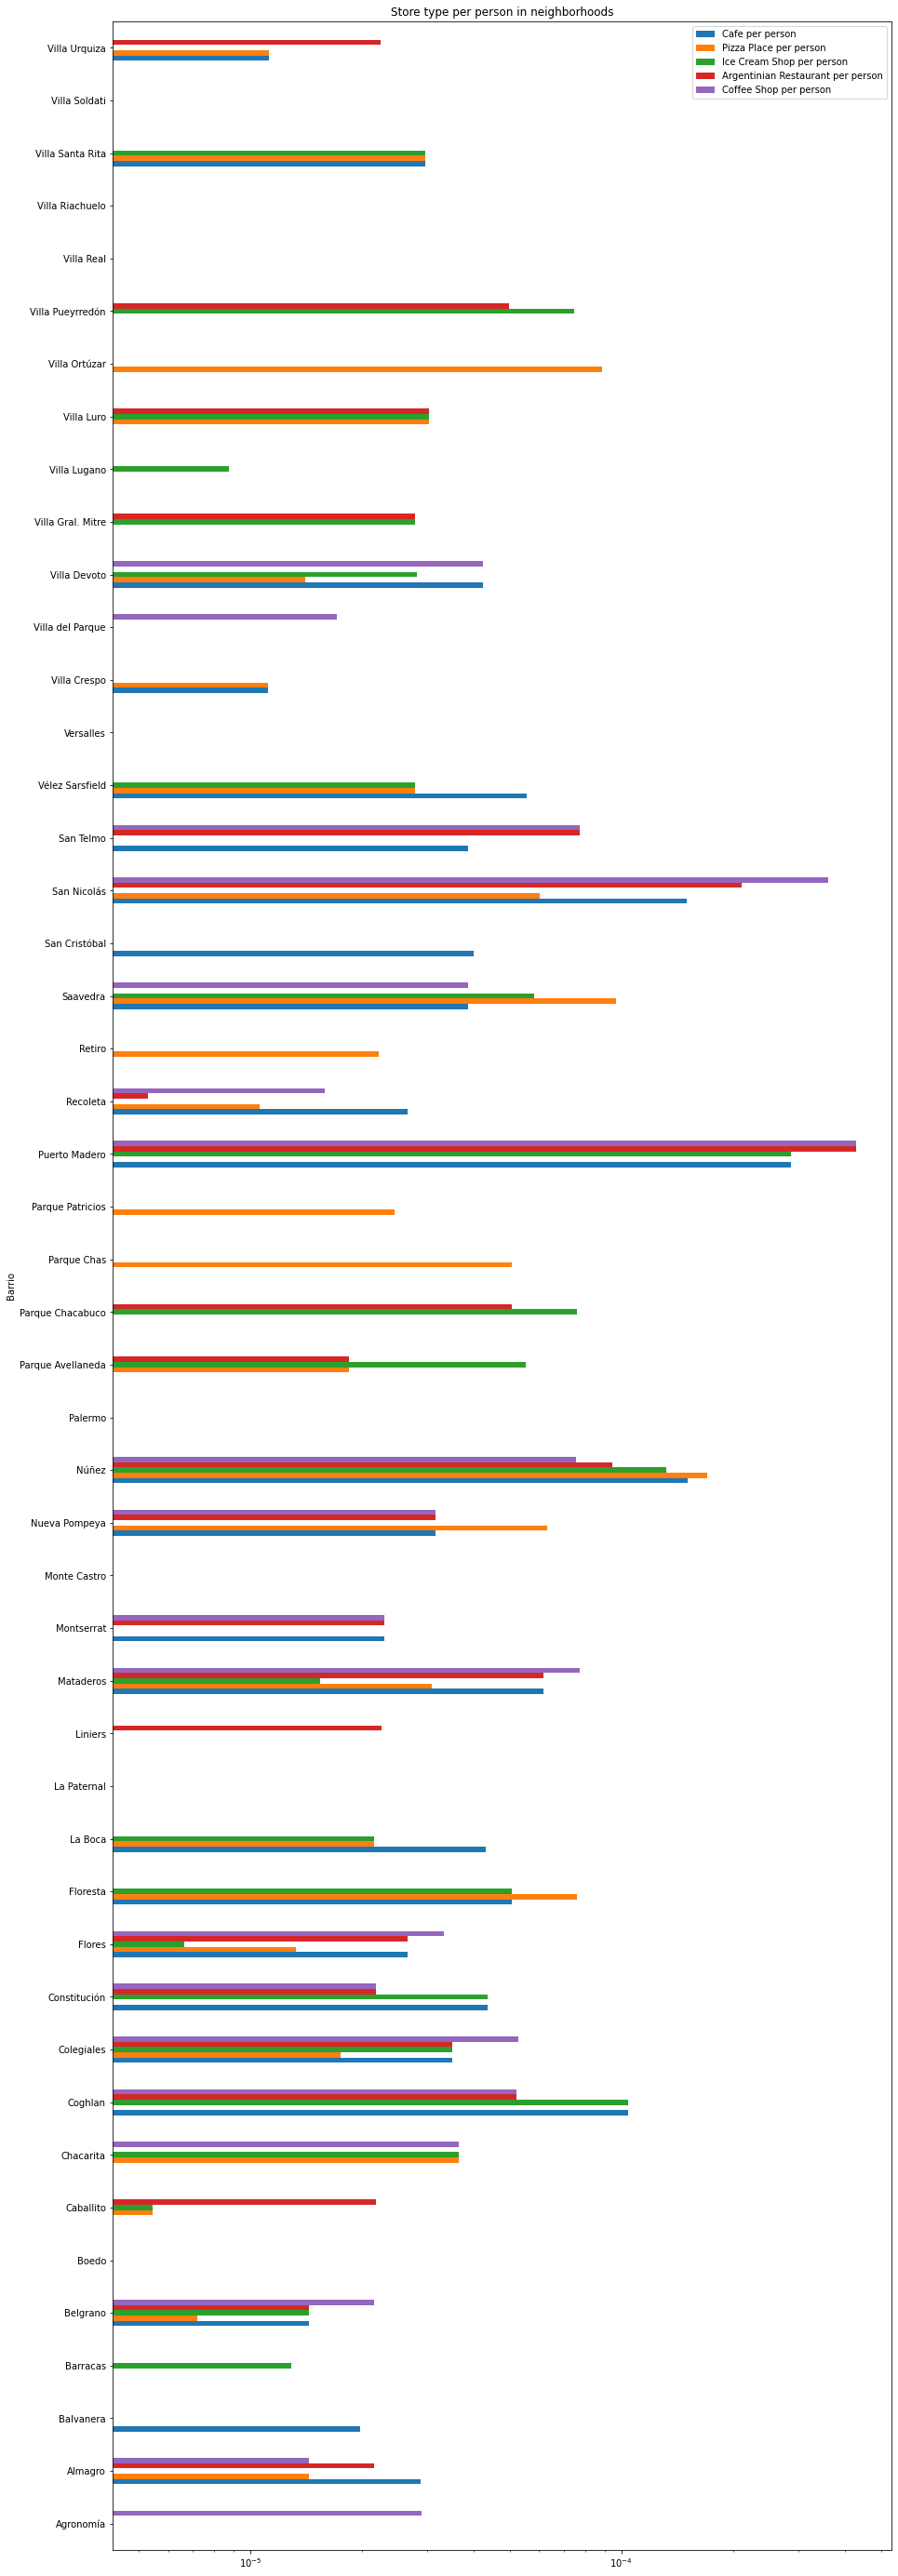

In [57]:
BA_res[["Cafe per person", "Pizza Place per person", "Ice Cream Shop per person", "Argentinian Restaurant per person", "Coffee Shop per person"]].plot(kind="barh", figsize=(15,50), title="Store type per person in neighborhoods", legend=True, logx=True, sort_columns=True)

Now lets see where we can place our investment:

For that we wil search for the neighborhoods with more inhabitants but least store density

In [67]:
from IPython.display import display

cafe_nan=BA_res[pd.isnull(BA_res["Cafe per person"])]
cafe_nan=cafe_nan[["Cafe per person", "Habitantes"]].sort_values(by="Habitantes",ascending=False)

pizza_nan=BA_res[pd.isnull(BA_res["Pizza Place per person"])]
pizza_nan=pizza_nan[["Pizza Place per person", "Habitantes"]].sort_values(by="Habitantes",ascending=False)

ice_nan=BA_res[pd.isnull(BA_res["Ice Cream Shop per person"])]
ice_nan=ice_nan[["Ice Cream Shop per person", "Habitantes"]].sort_values(by="Habitantes",ascending=False)

ar_nan=BA_res[pd.isnull(BA_res["Argentinian Restaurant per person"])]
ar_nan=ar_nan[["Argentinian Restaurant per person", "Habitantes"]].sort_values(by="Habitantes",ascending=False)

cs_nan=BA_res[pd.isnull(BA_res["Coffee Shop per person"])]
cs_nan=cs_nan[["Coffee Shop per person", "Habitantes"]].sort_values(by="Habitantes",ascending=False)


display(cafe_nan)
display(pizza_nan)
display(ice_nan)
display(ar_nan)
display(cs_nan)

,Cafe per person,Habitantes
Barrio,,
Palermo,NaN,252312.0
Caballito,NaN,183396.0
Villa Lugano,NaN,114253.0
Barracas,NaN,77474.0
Villa del Parque,NaN,58573.0
Parque Avellaneda,NaN,54191.0
Boedo,NaN,48520.0
Retiro,NaN,45002.0
Liniers,NaN,44234.0


,Pizza Place per person,Habitantes
Barrio,,
Palermo,NaN,252312.0
Balvanera,NaN,152198.0
Villa Lugano,NaN,114253.0
Barracas,NaN,77474.0
Villa del Parque,NaN,58573.0
San Cristóbal,NaN,49986.0
Boedo,NaN,48520.0
Constitución,NaN,45860.0
Liniers,NaN,44234.0


,Ice Cream Shop per person,Habitantes
Barrio,,
Palermo,NaN,252312.0
Recoleta,NaN,188780.0
Balvanera,NaN,152198.0
Almagro,NaN,139262.0
Villa Crespo,NaN,89859.0
Villa Urquiza,NaN,89360.0
Nueva Pompeya,NaN,63276.0
Villa del Parque,NaN,58573.0
San Cristóbal,NaN,49986.0


,Argentinian Restaurant per person,Habitantes
Barrio,,
Palermo,NaN,252312.0
Balvanera,NaN,152198.0
Villa Lugano,NaN,114253.0
Villa Crespo,NaN,89859.0
Barracas,NaN,77474.0
Villa Devoto,NaN,71013.0
Villa del Parque,NaN,58573.0
Saavedra,NaN,51723.0
San Cristóbal,NaN,49986.0


,Coffee Shop per person,Habitantes
Barrio,,
Palermo,NaN,252312.0
Caballito,NaN,183396.0
Balvanera,NaN,152198.0
Villa Lugano,NaN,114253.0
Villa Crespo,NaN,89859.0
Villa Urquiza,NaN,89360.0
Barracas,NaN,77474.0
Parque Avellaneda,NaN,54191.0
San Cristóbal,NaN,49986.0


### 4)Conclusions

After de different analysis we have done we can conclude the following facts:

- The top 5 (in order) stores to invest in are:
    - Café
    - Pizza Place
    - Ice Cream Shop
    - Argentinian Restaurant
    - Coffee Shop
 
    
- The best place to invest is in Palermo: this is because it is the place where we don´t have this kind of stores, and in this neighborhood we have more inhabitants than the others.